[1.00000000e+01 7.74263683e+01 5.99484250e+02 4.64158883e+03
 3.59381366e+04 2.78255940e+05 2.15443469e+06 1.66810054e+07
 1.29154967e+08 1.00000000e+09]
[0.61810033 0.46070479 0.46070479 0.20603344]
[0.5685901  0.50206224 0.43942399 0.16417688]


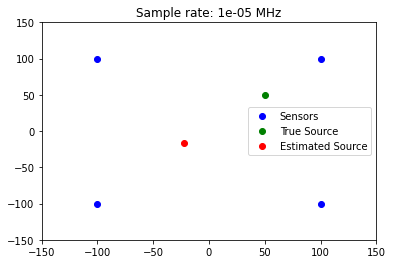

[0.61810033 0.46070479 0.46070479 0.20603344]
[0.61887981 0.45692801 0.46436805 0.2101551 ]


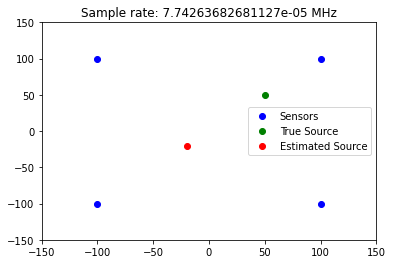

[0.61810033 0.46070479 0.46070479 0.20603344]
[0.61749209 0.46116458 0.46138856 0.2059473 ]


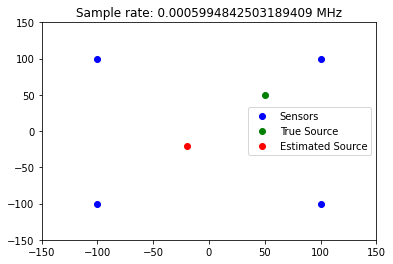

[0.61810033 0.46070479 0.46070479 0.20603344]
[0.61815618 0.46064894 0.46078939 0.2059492 ]


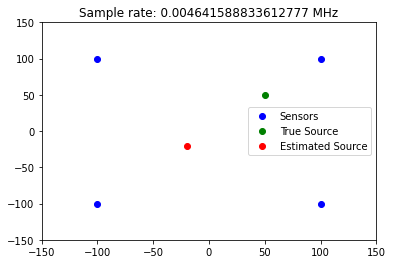

[0.61810033 0.46070479 0.46070479 0.20603344]
[0.61809007 0.46070373 0.4606913  0.20602189]


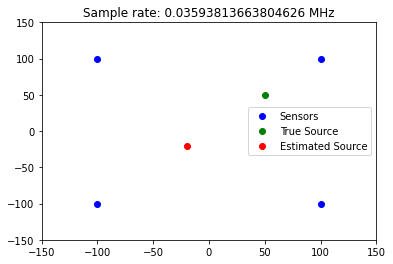

[0.61810033 0.46070479 0.46070479 0.20603344]
[0.61810042 0.46070364 0.46070519 0.20603372]


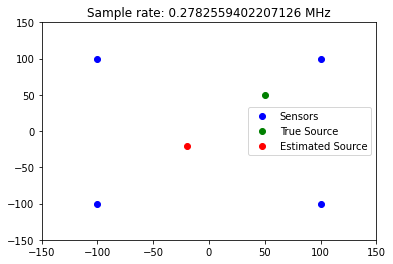

[0.61810033 0.46070479 0.46070479 0.20603344]
[0.61810036 0.46070478 0.46070456 0.20603353]


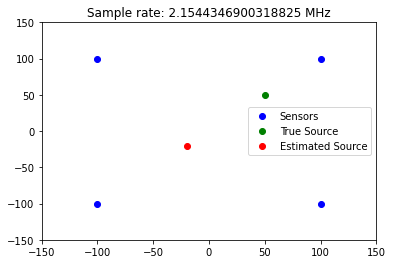

[0.61810033 0.46070479 0.46070479 0.20603344]
[0.61810036 0.46070481 0.46070477 0.20603342]


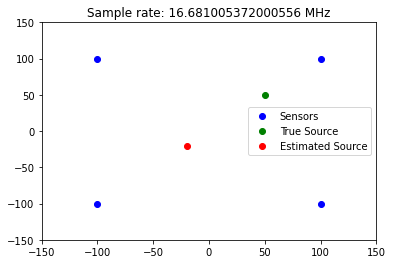

[0.61810033 0.46070479 0.46070479 0.20603344]
[0.61810034 0.46070479 0.46070479 0.20603345]


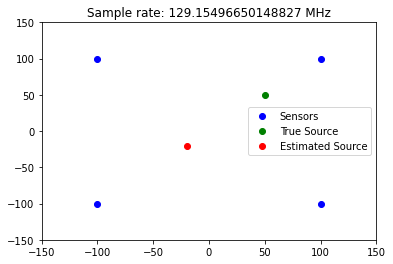

[0.61810033 0.46070479 0.46070479 0.20603344]
[0.61810033 0.46070479 0.46070479 0.20603344]


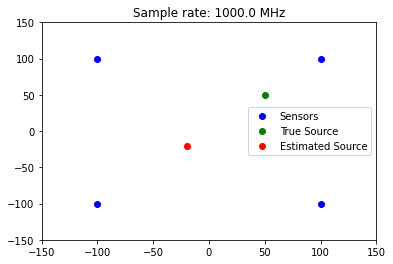

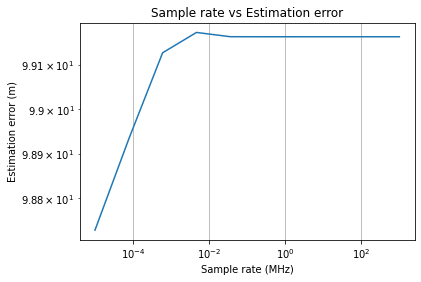

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the speed of sound in m/s
speed_of_sound = 343.2

# Define the locations of the sensors
sensor_locations = np.array([[-100, -100], [-100, 100], [100, -100], [100,100]])

# Define the location of the signal source
signal_source = np.array([50, 50])

def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def simulate_sample_rate(sample_rate):
    # Calculate the time it takes for the signal to reach each sensor
    signal_times = np.array([calculate_distance(signal_source, sensor_location) / speed_of_sound for sensor_location in sensor_locations])
    print(signal_times)

    # Add jitter to the signal times proportional to the sample rate
    signal_times += np.random.uniform(-0.5/sample_rate, 0.5/sample_rate, size=signal_times.shape)

    # add aother jitter
    # signal_times += np.random.uniform(-0.0001, 0.0001, size=signal_times.shape)
    print(signal_times)

    # Calculate the TDoA for each pair of sensors
    tdoa = np.zeros((len(sensor_locations), len(sensor_locations)))
    for i in range(len(sensor_locations)):
        for j in range(len(sensor_locations)):
            tdoa[i, j] = signal_times[j] - signal_times[i]

    # Use the TDoA to estimate the source location
    estimated_source = np.zeros(signal_source.shape)
    for i in range(len(sensor_locations)):
        for j in range(i+1, len(sensor_locations)):
            # Calculate the difference in distance based on the TDoA and the speed of sound
            distance_diff = tdoa[i, j] * speed_of_sound

            # Use the sample rate to calculate the estimated source location
            estimated_source += (sensor_locations[i] + sensor_locations[j]) / 2 + (sensor_locations[j] - sensor_locations[i]) * distance_diff / (2 * calculate_distance(sensor_locations[i], sensor_locations[j]))

    # Average the estimated source location
    estimated_source /= len(sensor_locations) * (len(sensor_locations) - 1) / 2

    return estimated_source, tdoa

# Simulate different sample rates from 100 kHz to 1 GHz
sample_rates = np.logspace(1, 9, num=10)
print(sample_rates)

# Store the estimated source locations and the TDoA for each sample rate
estimated_sources = np.zeros((len(sample_rates), 2))
tdoas = np.zeros((len(sample_rates), len(sensor_locations), len(sensor_locations)))

# Generate the figures for each sample rate
for i, sample_rate in enumerate(sample_rates):
    estimated_sources[i], tdoas[i] = simulate_sample_rate(sample_rate)

    plt.figure()
    plt.xlim(-150,150)
    plt.ylim(-150,150)
    plt.scatter(sensor_locations[:, 0], sensor_locations[:, 1], c='blue', label='Sensors')
    plt.scatter(signal_source[0], signal_source[1], c='green', label='True Source')
    plt.scatter(estimated_sources[i, 0], estimated_sources[i, 1], c='red', label='Estimated Source')
    
    plt.title(f"Sample rate: {sample_rate/1e6} MHz")
    plt.legend()
    plt.show()

estimation_error = [calculate_distance(estimated_source, signal_source) for estimated_source in estimated_sources]

plt.figure()
plt.loglog(sample_rates/1e6, estimation_error)
plt.xlabel('Sample rate (MHz)')
plt.ylabel('Estimation error (m)')
plt.title('Sample rate vs Estimation error')
plt.grid(True)
plt.show()
